In [68]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

# 1) Preprocessing data

In [69]:
Test = pd.read_csv(r'C:\Users\Maciek\Documents\Python Scripts\Titanic\test.csv')
train = pd.read_csv(r'C:\Users\Maciek\Documents\Python Scripts\Titanic\train.csv')
y_test = pd.read_csv(r'C:\Users\Maciek\Documents\Python Scripts\Titanic\gender_submission.csv')
test = pd.concat([Test,y_test],axis=1)



def features(dataset):    
    def sex(s):
        if s == 'male':return 1
        elif s == 'female': return 0
    for counter,i in enumerate(dataset['Sex']): dataset['Sex'][counter] = sex(i)
        
    for counter,value in enumerate(dataset['Embarked']):
        if str(value) == 'nan':dataset['Embarked'][counter] = 0 
        else : dataset['Embarked'][counter] = ord(str(value))
            
            
    return dataset

def X(dataset): return dataset[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
def clearing(dataset): return dataset[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]



test = features(clearing(test)).dropna()
train = features(clearing(train)).dropna()




# Defining X and Y 
X_test = scale(X(test))
X_train = scale(X(train))
Y_train = np.asarray(train['Survived'])
Y_test = np.asarray(test['Survived'])

<ipython-input-69-c395ca5d697f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for counter,i in enumerate(dataset['Sex']): dataset['Sex'][counter] = sex(i)
<ipython-input-69-c395ca5d697f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test = features(clearing(test)).dropna()
<ipython-input-69-c395ca5d697f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else : dataset['Embarked'][counter] = ord(str(value))
<ipython-input-69-c39

# 2) Logisitic regression Model

In [77]:
import numpy as np
class LogisticRegression():
    def __init__(self,iterations=100,alpha=0.0115):
        self.iterations = iterations
        self.alpha = alpha
        self.J = []
        self.J_val = []
        self.output = 0
        self.o_val = 0
        self.regularization = False

    def sigmoid(self,a):
        return 1/(1+np.exp(-a))

    def split(self,dataset,value):
        part1 = dataset[:int(len(dataset)*(1-value))]
        part2 = dataset[len(part1):]
        return part1, part2

    def fit(self,X,y,regularization = False,validation = 0.1):
        self.validation = validation
        self.regularization = regularization

        self.X , self.x_val = self.split(X,self.validation)
        self.y , self.y_val = self.split(y.reshape(y.shape[0],1),self.validation)

        self.m = self.X.shape[1]
        self.W = np.random.randn(self.m,1)

        self.m_val = self.x_val.shape[1]
        self.W_val = np.random.randn(self.m_val,1)

        assert self.X.shape[0] == self.y.shape[0] and self.x_val.shape[0] == self.y_val.shape[0]

        for i in range(self.iterations):
            a = self.X.dot(self.W)
            a_val = self.x_val.dot(self.W_val)

            self.output = self.sigmoid(a)
            self.o_val = self.sigmoid(a_val)

            assert self.output.shape == self.y.shape and self.o_val.shape == self.y_val.shape

            self.cost()
            self.update()

    def cost(self,Lambda=0):
        if self.regularization is False:
            J = sum(self.y * np.log(self.output) + (1-self.y)*np.log(1-self.output))
            self.J.append(*(1/-self.m)*J)

            # Validation

            J_val = sum(self.y_val * np.log(self.o_val) + (1-self.y_val)*np.log(1-self.o_val))
            self.J_val.append(*(1/-self.m_val)*J_val)

        else :
            J = sum(self.y * np.log(self.output) + (1-self.y)*np.log(1-self.output)) + Lambda * sum(np.power(W,2))
            self.J.append(*(1/-self.m)*J)

            # Validation

            J_val = sum(self.y_val * np.log(self.o_val) + (1-self.y_val)*np.log(1-self.o_val)) + Lambda * sum(np.power(self.W_val,2))
            self.J_val.append(*(1/-self.m_val)*J)


    def update(self):
        dw = np.dot(self.X.T,self.output-self.y)
        self.W = self.W - (self.alpha * dw)

        # Validation

        dw_val = np.dot(self.x_val.T, self.o_val - self.y_val)
        self.W_val = self.W_val - (self.alpha * dw_val)

    def predict(self,x,threshold=0.5):
        prediction = self.sigmoid(np.dot(x,self.W))
        prediction[prediction>threshold] = 1
        prediction[prediction<=threshold] = 0
        return prediction

    def confusion_matrix(self,predictions,y):
        assert predictions.shape[0] == y.shape[0]
        self.TP, self.TN, self.FN, self.FP = 0,0,0,0

        for i in range(len(predictions)):
            if predictions[i]==1 and y[i]==1:self.TP+=1
            elif predictions[i]==1 and y[i]==0:self.FP+=1
            elif predictions[i]==0 and y[i]==1:self.FN+=1
            elif predictions[i]==0 and y[i]==0:self.TN+=1


    def precision(self):
        return self.TP/(self.TP+self.FP)

    def recall(self):
        return self.TP/(self.TP+self.FN)

    def accuracy(self):
        return (self.TP+self.TN)/(self.TP+self.TN+self.FP+self.FN)

    def F1_score(self):
        return (2*self.precision()*self.recall())/(self.precision() + self.recall())

    def plot(self):
        x = np.linspace(0,self.iterations,self.iterations)
        y = np.asarray(self.J)
        y_val = np.asarray(self.J_val)
        assert x.shape == y.shape and x.shape == y_val.shape
        plt.plot(x,y)
        plt.plot(x,y_val)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')


##  * Model with given hyperparameters

In [78]:
model = LogisticRegression()
model.fit(X_train,Y_train)


predictions = model.predict(X_test)
model.confusion_matrix(predictions,Y_test)
model.accuracy()

0.9395770392749244

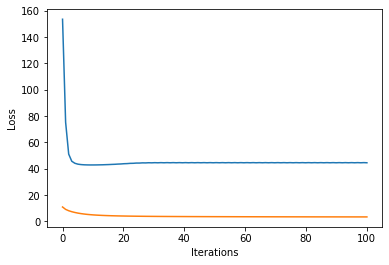

In [79]:
model.plot()

In [80]:
model.precision()

0.8905109489051095

In [81]:
model.recall()

0.9606299212598425

In [82]:
model.F1_score()

0.9242424242424242

# 3) Tuning learning rate and iterations

<ipython-input-77-1fe1e70caf5a>:49: RuntimeWarning: divide by zero encountered in log
  J = sum(self.y * np.log(self.output) + (1-self.y)*np.log(1-self.output))
<ipython-input-77-1fe1e70caf5a>:49: RuntimeWarning: invalid value encountered in multiply
  J = sum(self.y * np.log(self.output) + (1-self.y)*np.log(1-self.output))


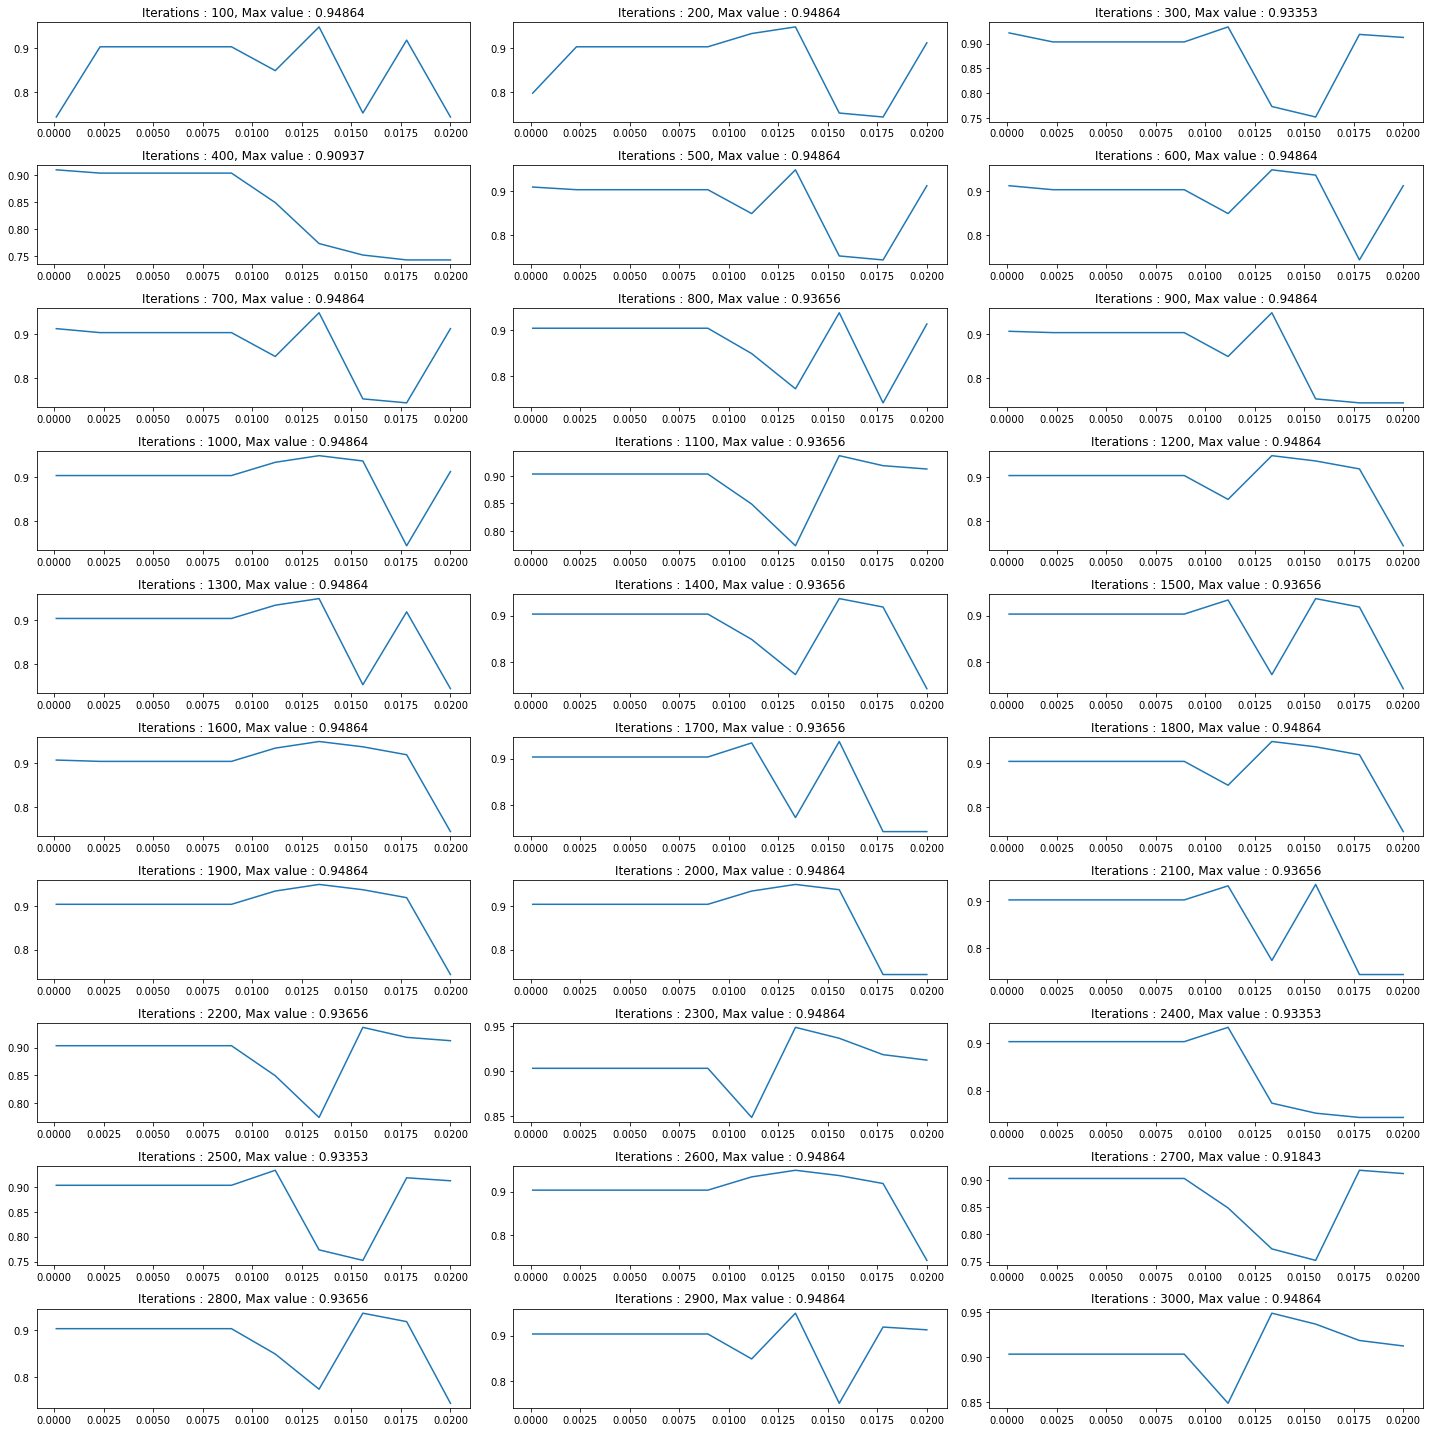

In [83]:
def optimizing_lr_and_iterations(): 
    iteration = [i*100 for i in range(1,31)]
    lr = np.linspace(0.0001,0.02,10)
    data = []
    for i in range(len(iteration)):
        lrs = [] 
        for j in range(len(lr)):
            model = LogisticRegression(iterations=iteration[i],alpha = lr[j])
            model.fit(X_train,Y_train)
            predictions = model.predict(X_test)
            model.confusion_matrix(predictions,Y_test)
            lrs.append(model.accuracy())
        data.append(lrs)
    
    
    r,c = 10,3
    fig,axs = plt.subplots(r,c)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    maxs = [max(i) for i in data]
    counter = 0 
    for i in range(r):
        for j in range(c) :
            axs[i][j].plot(lr,data[counter])
            axs[i][j].set_title('Iterations : {}, Max value : {}'.format(iteration[counter],round(maxs[counter],5)))
            counter+=1
    fig.tight_layout()
    
    
    # OPTIMAL VALUES
    optimal,index,iters = 0,0,0
    for i in range(len(data)): 
        for j in range(len(data[i])): 
            if data[i][j] > optimal:
                optimal = data[i][j]
                index = j
                iters = i
                
    return lr[index],iteration[iters]
        
    
lr, iterations = optimizing_lr_and_iterations()
